<h1>Feather Tutorial</h1>

The required input images should be generated using feather_tutorial_create_initial_images.ipynb

In [1]:
from toolviper.dask.client import local_client
log_params = {'log_level':'DEBUG'}
worker_log_params = {'log_level':'DEBUG'}
viper_client = local_client(cores=1, memory_limit="8.0GiB",log_params=log_params,worker_log_params=worker_log_params)
#viper_client = local_client(serial_execution=True)
# viper_client

from astroviper.imaging import feather
feather(outim={"name": "feathered_image.img.zarr", "format": "zarr", "overwrite": True}, highres= 'int.zarr', lowres= 'sd.zarr', sdfactor=1)

[2025-08-05 17:51:25,667]     INFO    viperlog:  Checking functions availability: 
[2025-08-05 17:51:25,669]     INFO    viperlog:  Loading module: slurm -- Success 
[2025-08-05 17:51:25,670]     INFO    viperlog:     dask_jobqueue is available 
[2025-08-05 17:51:25,672]     INFO    viperlog:  Loading module: dask_ssh -- Fail 
[2025-08-05 17:51:25,672]     INFO    viperlog:     asyncssh is unavailable 
[2025-08-05 17:51:25,673]     INFO    viperlog:     jupyter_server_proxy is unavailable 
[2025-08-05 17:51:25,674]     INFO    viperlog:     paramiko is unavailable 
[2025-08-05 17:51:25,675]     INFO    viperlog:  Loading module: CUDA -- Fail 
[2025-08-05 17:51:25,675]     INFO    viperlog:     dask_cuda is unavailable 
[2025-08-05 17:51:25,676]     INFO    viperlog:  Available functions of this environment: slurm 
[2025-08-05 17:51:25,680]     INFO    viperlog:  Module path: /home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/toolviper 
[2025-08-05 17:51:25,699]  WAR

INFO:graphviper:Time to compute() feather 13.38024091720581s


/home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/dask/base.py:1105: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


(1, 16, 1, 1024, 1024)
cellsize of feathered image [15. 15.] arcsec
beam of feathered image <xarray.DataArray 'BEAM' (time: 1, frequency: 16, polarization: 1, beam_param: 3)> Size: 192B
array([[[[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237, -0.05489258]],

        [[ 0.00031759,  0.00031237

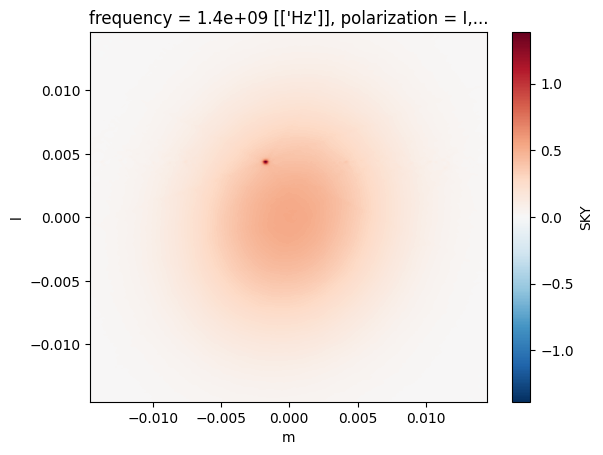

In [239]:
from xradio.image import load_image, read_image
feather_xds = load_image("feathered_image.img.zarr")
print(feather_xds.SKY.shape)
center = feather_xds.SKY.shape[3]//2
cell = np.array([feather_xds.l[0] - feather_xds.l[1], feather_xds.m[1] - feather_xds.m[0]]) * 180*3600/np.pi
print(f"cellsize of feathered image {cell} arcsec")
print(f"beam of feathered image {feather_xds.BEAM}")

import numpy as np
np.nanmax(np.abs(feather_xds.SKY.values))
mslice = slice(center-200, center+200)
feather_xds.SKY.isel(polarization=0,frequency=0,l=mslice, m=mslice).plot()

[2025-08-07 13:10:47,688]     INFO  graphviper:  J2000 found as system reference frame in CASA image This corresponds to fk5(equinox="j2000") in astropy. Metadata will be written appropriately 


INFO:graphviper:J2000 found as system reference frame in CASA image This corresponds to fk5(equinox="j2000") in astropy. Metadata will be written appropriately


Successful readonly open of default-locked table feather_model_convolved.im/: 1 columns, 1 rows
[2025-08-07 13:10:47,704]     INFO  graphviper:  J2000 found as native reference frame in CASA image This corresponds to fk5(equinox="j2000") in astropy. Metadata will be written appropriately 


INFO:graphviper:J2000 found as native reference frame in CASA image This corresponds to fk5(equinox="j2000") in astropy. Metadata will be written appropriately


cellsize of model image [15. 15.] arcsec
beam diff <xarray.DataArray 'BEAM' (time: 1, frequency: 3, polarization: 1, beam_param: 3)> Size: 72B
dask.array<subtract, shape=(1, 3, 1, 3), dtype=float64, chunksize=(1, 3, 1, 3), chunktype=numpy.ndarray>
Coordinates:
  * beam_param    (beam_param) <U5 60B 'major' 'minor' 'pa'
  * frequency     (frequency) float64 24B 1.413e+09 1.42e+09 1.427e+09
  * polarization  (polarization) <U1 4B 'I'
  * time          (time) float64 8B 0.0
    velocity      (frequency) float64 24B 8.251e+06 6.876e+06 5.501e+06


(1, 16, 1, 1024, 1024)

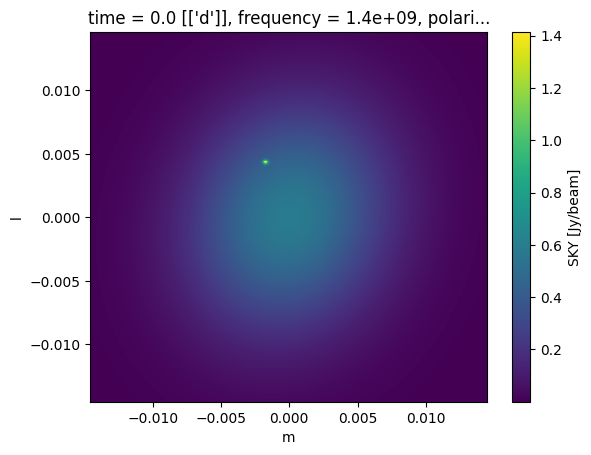

In [242]:
xds_model=read_image("feather_model_convolved.im/")
xds_model.SKY.isel(polarization=0,frequency=0,l=mslice, m=mslice).plot()
cell = np.array([xds_model.l[0] - xds_model.l[1], xds_model.m[1] - xds_model.m[0]]) * 180*3600/np.pi
print(f"cellsize of model image {cell} arcsec")
xds_model.SKY.shape

beam diff [[[[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]

  [[ 3.83273311e-09  2.25630321e-09 -9.56220624e-10]]]]
(1, 16, 1, 1024, 1024)
(1, 16, 1, 1024, 1024)
(1, 16, 1, 1024, 1024)


/home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 64.00 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


0.056043267


/home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 64.00 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)


center <xarray.DataArray 'SKY' ()> Size: 4B
array(0.5858575, dtype=float32)
Coordinates:
    time             float64 8B 0.0
    frequency        float64 8B 1.4e+09
    polarization     <U1 4B 'I'
    velocity         float64 8B 1.1e+07
    l                float64 8B 0.0
    m                float64 8B 0.0
    right_ascension  float64 8B 7.499e-33
    declination      float64 8B 0.0
Attributes:
    image_type:       Intensity
    units:            Jy/beam
    telescope:        {'name': 'UNKNOWN'}
    observer:         UNKNOWN
    obsdate:          {'attrs': {'units': ['d'], 'scale': 'UTC', 'format': ''...
    pointing_center:  {'attrs': {'frame': 'fk5', 'type': 'sky_coord', 'units'...
    object_name:      
    user:             {}
    active_mask:      None
    description:      None
    history:          <xarray.Dataset> Size: 5kB\nDimensions:    (row: 4)\nCo... <xarray.DataArray 'SKY' ()> Size: 4B
array(0.5333406, dtype=float32)
Coordinates:
    declination      float64 8B -0.2
   

/home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 64.01 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 64.01 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero en

min, max frac diff <xarray.DataArray 'SKY' ()> Size: 4B
array(-0.09630674, dtype=float32) <xarray.DataArray 'SKY' ()> Size: 4B
array(0.4368788, dtype=float32)
sums <xarray.DataArray 'SKY' ()> Size: 4B
array(340411.62, dtype=float32) <xarray.DataArray 'SKY' ()> Size: 4B
array(340417.6, dtype=float32)


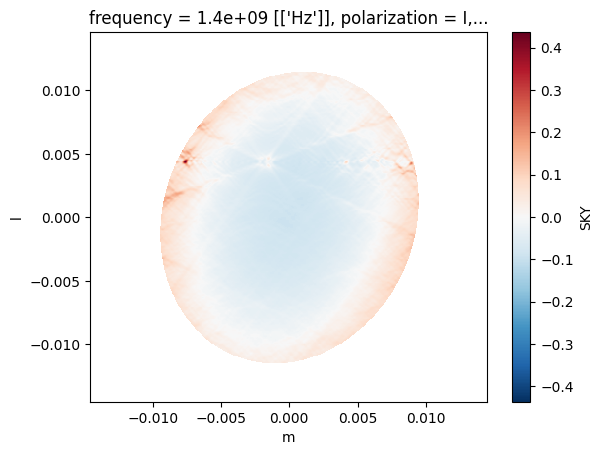

In [245]:
import xarray as xr
feather_xds_aligned, model_xds_aligned = xr.align(feather_xds, xds_model, join="override")
diff = feather_xds_aligned - model_xds_aligned
print(f"beam diff {(feather_xds_aligned.BEAM - model_xds_aligned.BEAM).values}")

th = "SKY"
print(feather_xds_aligned[th].shape)
print(model_xds_aligned[th].shape)
diff = feather_xds_aligned[th] - model_xds_aligned[th]
print(diff.shape)
print(np.max(np.abs(diff.values)))
frac_diff = feather_xds_aligned[th]/model_xds_aligned[th] - 1
# np.max(np.abs(pc_diff[diff > 0.5])
#diff.isel(l=slice(512-256,512+256),m=slice(512-256,512+256),polarization=0,frequency=0).plot()
frac_diff.where(model_xds_aligned.SKY > 0.1).isel(polarization=0,frequency=0, l=mslice, m=mslice).plot()

inner_frac = frac_diff.isel(frequency=0, l=mslice, m=mslice).where(model_xds_aligned.SKY > 0.1)

print("center",model_xds_aligned.SKY[0,0,0,center,center].compute(), feather_xds_aligned.SKY[0,0,0,center,center].compute())
print("min, max frac diff", inner_frac.min().compute(), inner_frac.max().compute())
print("sums", model_xds_aligned.SKY.sum().compute(), feather_xds_aligned.SKY.sum().compute())

In [232]:
frac_weighted = frac_diff * model_xds_aligned.SKY
frac_weighted.max().compute()


/home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 64.00 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/home/dmehring/miniforge3/envs/astroviper/lib/python3.12/site-packages/dask/_task_spec.py:741: RuntimeWarning: invalid value encountered in multiply
  return self.func(*new_argspec)


<xarray.DataArray 'SKY' ()> Size: 4B
array(0.05454655, dtype=float32)

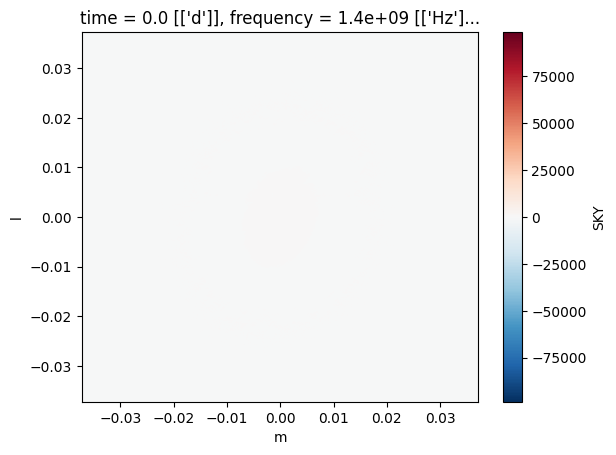

In [233]:
pc_diff.isel(polarization=0,frequency=0).plot()

In [234]:
inner_coords = {"time": 0, "frequency": 0, "polarization": 0, "l": mslice, "m": mslice}
very_inner_coords = {"time": 0, "frequency": 0, "polarization": 0, "l": slice(center-50, center+50), "m": slice(center-50, center+50)}


def max_coord(xda: xr.DataArray, label: str):
    # Assume `da` is your 2D xarray.DataArray
    max_idx = xda.argmax(dim=xda.dims)

    # Extract coordinate values at that position
    coords = {dim: xda[dim].values[max_idx[dim].item()] for dim in xda.dims}
    # print(xda.coords["frequency"].values)
    # coords |= {"frequency": xda.coords["frequency"].values}
    mymax = xda.sel(coords, method="nearest").item()
    print(f"coords of max for {label}: {coords}")
    print(f"max value for {label}: {mymax}")
    return {"max": mymax, "coords": coords}

pt_source_guess = max_coord(feather_xds_aligned.SKY.isel(inner_coords), "point source")
ext_gaussian_guess = max_coord(feather_xds_aligned.SKY.isel(very_inner_coords), "extended gaussian")

del_l = np.abs(feather_xds_aligned.coords['l'].values[1] - feather_xds_aligned.coords['l'].values[0])
del_m = del_l
pt_source_guess |= {"fwhm_a": 3*del_l, "fwhm_b": 3*del_m, "pa": 0}
ext_gaussian_guess |= {"fwhm_a": 50*del_l, "fwhm_b": 50*del_m, "pa": 0}

coords of max for point source: {'l': np.float64(0.004363323129985824), 'm': np.float64(-0.0017453292519943294)}
max value for point source: 1.3862088918685913
coords of max for extended gaussian: {'l': np.float64(7.27220521664304e-05), 'm': np.float64(-7.27220521664304e-05)}
max value for extended gaussian: 0.5338305830955505


In [235]:
import numpy as np

def single_elliptical_gaussian_fwhm(coords, amp, x0, y0, fwhm_x, fwhm_y, theta):
    x, y = coords
    xo = x - x0
    yo = y - y0
    cos_t = np.cos(theta)
    sin_t = np.sin(theta)

    x_rot = cos_t * xo + sin_t * yo
    y_rot = -sin_t * xo + cos_t * yo
    f = 2.354820045  # 2*sqrt(2*ln(2))
    sigma_x = fwhm_x / f
    sigma_y = fwhm_y / f

    return amp * np.exp(-0.5 * ((x_rot / sigma_x) ** 2 + (y_rot / sigma_y) ** 2)).ravel()


def double_elliptical_gaussian_fwhm(coords, 
                                    amp1, x01, y01, fwhm_x1, fwhm_y1, theta1,
                                    amp2, x02, y02, fwhm_x2, fwhm_y2, theta2):

    g1 = single_elliptical_gaussian(coords, amp1, x01, y01, fwhm_x1, fwhm_y1, theta1)
    g2 = single_elliptical_gaussian(coords, amp2, x02, y02, fwhm_x2, fwhm_y2, theta2)

    # return (g1 + g2).ravel()
    return g1 + g2


In [236]:
import numpy as np
import xarray as xr
from scipy.optimize import curve_fit

def fit_single_gaussian_fwhm(xda: xr.DataArray, p0: list, bounds: tuple):
    data = xda.values
    y = xda.coords["m"].values
    x = xda.coords["l"].values
    X, Y = np.meshgrid(x, y)
    popt, pcov = curve_fit(
        single_elliptical_gaussian_fwhm,
        (X, Y),
        data.ravel(),
        p0=p0, bounds=bounds
    )
    model = single_elliptical_gaussian_fwhm((X, Y), *popt).reshape(data.shape)
    return {
        "params": {
            "amp": popt[0], "x0": popt[1], "y0": popt[2],
            "fwhm_x": popt[3], "fwhm_y": popt[4], "theta": popt[5],
        },
        "fitted_model": xr.DataArray(model, coords=xda.coords, dims=xda.dims),
        "raw_fit_output": {
            "popt": popt,
            "pcov": pcov
        }
    }

def fit_double_gaussian_fwhm(da: xr.DataArray, p0: list, bounds: tuple):
    """
    Fit two elliptical 2D Gaussians (FWHM-parametrized, no offset) to a 2D xarray.DataArray.

    Parameters:
        da (xr.DataArray): 2D array with dimensions ('y', 'x') or ('row', 'col').

    Returns:
        dict: Dictionary containing fit parameters and fitted model array.
    """
    # print("dims", da.dims)  # Confirm dimension names and order
    # print(type(da.coords[da.dims[1]].values))  # Check dtype
    # print(da.coords[da.dims[1]].values[:5])    # Preview values
    
    # Check shape and get coordinates
    data = da.values
    y = da.coords["m"].values
    x = da.coords["l"].values
    X, Y = np.meshgrid(x, y)

    """
    # Initial guess
    max_val = np.max(data)
    x_mid = x[len(x) // 2]
    y_mid = y[len(y) // 2]
    x1, x2 = x[len(x) // 3], x[len(x) * 2 // 3]
    y1, y2 = y[len(y) // 3], y[len(y) * 2 // 3]

    p0 = [
        max_val * 0.6, x1, y1, 2.0, 2.0, 0.0,   # Gaussian 1
        max_val * 0.4, x2, y2, 2.0, 2.0, 0.0    # Gaussian 2
    ]
    """

    # Fit
    popt, pcov = curve_fit(
        double_elliptical_gaussian_fwhm,
        (X, Y),
        data.ravel(),
        p0=p0, bounds=bounds
    )

    # Evaluate model
    model = double_elliptical_gaussian_fwhm((X, Y), *popt).reshape(data.shape)

    # Return results in a dict
    return {
        "params": {
            "amp1": popt[0], "x01": popt[1], "y01": popt[2],
            "fwhm_x1": popt[3], "fwhm_y1": popt[4], "theta1": popt[5],
            "amp2": popt[6], "x02": popt[7], "y02": popt[8],
            "fwhm_x2": popt[9], "fwhm_y2": popt[10], "theta2": popt[11],
        },
        "fitted_model": xr.DataArray(model, coords=da.coords, dims=da.dims),
        "raw_fit_output": {
            "popt": popt,
            "pcov": pcov
        }
    }


In [237]:
feather_inner = feather_xds_aligned.SKY.isel(frequency=0, l=mslice, m=mslice)

def make_guess(gaussians: list[dict]) -> list:
    p0 = []
    for g in gaussians:
        print("keys", g.keys())
        p0.extend([g["max"], g["coords"]["l"], g["coords"]["m"], g["fwhm_a"], g["fwhm_b"], g["pa"]])
    return p0
    
# p0 = make_guess([pt_source_guess, ext_gaussian_guess])
# print("p0", p0)
# bounds=(
#        [0, -np.inf, -np.inf, 0, 0, -np.pi,  # lower bounds
#         -np.inf, -np.inf, -np.inf, 0, 0, -np.pi],
#        [np.inf, np.inf, np.inf, np.inf, np.inf, np.pi,  # upper bounds
#         np.inf, np.inf, np.inf, np.inf, np.inf, np.pi]
#    )
# res = fit_double_gaussian_fwhm(feather_inner, p0, bounds)

bounds=(
    [0, -np.inf, -np.inf, 0, 0, -np.pi],
    [np.inf, np.inf, np.inf, np.inf, np.inf, np.pi]
)
p0 = make_guess([ext_gaussian_guess])
print("p0", p0)
res = fit_single_gaussian_fwhm(feather_inner, p0, bounds)

print(res)


keys dict_keys(['max', 'coords', 'fwhm_a', 'fwhm_b', 'pa'])
p0 [0.5338305830955505, np.float64(7.27220521664304e-05), np.float64(-7.27220521664304e-05), np.float64(0.0036361026083214093), np.float64(0.0036361026083214093), 0]
{'params': {'amp': np.float64(0.5338789785351091), 'x0': np.float64(4.8545748071709734e-06), 'y0': np.float64(-1.2515581524614581e-05), 'fwhm_x': np.float64(0.012319568700401929), 'fwhm_y': np.float64(0.015096535899208853), 'theta': np.float64(-0.2575033498019872)}, 'fitted_model': <xarray.DataArray (time: 1, polarization: 1, l: 400, m: 400)> Size: 1MB
array([[[[0.00045578, 0.00047479, 0.00049451, ..., 0.00179117,
          0.001731  , 0.00167253],
         [0.0004695 , 0.00048908, 0.00050938, ..., 0.00183349,
          0.00177187, 0.00171199],
         [0.00048357, 0.00050373, 0.00052463, ..., 0.00187655,
          0.00181346, 0.00175215],
         ...,
         [0.00172636, 0.00178708, 0.00184958, ..., 0.00055392,
          0.00053195, 0.00051075],
         [0.0

In [238]:
rad_to_deg = 180/np.pi
rad_to_arcsec = 3600*rad_to_deg

res["params"]["x0"] *= rad_to_arcsec
res["params"]["y0"] *= rad_to_arcsec
res["params"]["fwhm_x"] *= rad_to_arcsec
res["params"]["fwhm_y"] *= rad_to_arcsec
res["params"]["theta"] *= rad_to_deg

print(res["params"])
4.8e-6*rad_to_arcsec

{'amp': np.float64(0.5338789785351091), 'x0': np.float64(1.001327932013156), 'y0': np.float64(-2.5815239982443656), 'fwhm_x': np.float64(2541.0934510361967), 'fwhm_y': np.float64(3113.884052252649), 'theta': np.float64(-14.753855154134769)}


0.9900710699860625